# Project 5 - Advertisment Budget using Linear Regression

by 23AIML056_Kavya

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Data Preprocessing

In [2]:
df = pd.read_csv("D:\\Datasets\\AdvertisingBudgetAndSales.csv")
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


unnamed: 0 is just a serial number column so we can safely drop it

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


other columns are named with spaces in between so rename those columns

In [4]:
# Adding the data to a different column
df["TV"] = df["TV Ad Budget ($)"]
df["Radio"] = df["Radio Ad Budget ($)"]
df["Newspaper"] = df["Newspaper Ad Budget ($)"]
df["Sales"] = df["Sales ($)"]
df.drop(
    columns=[
        "TV Ad Budget ($)",
        "Newspaper Ad Budget ($)",
        "Radio Ad Budget ($)",
        "Sales ($)",
    ],
    axis=1,
    inplace=True,
)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Exploratory Data Analysis

In [7]:
# get boxplot and histogram

def BoxAndHist(col, plot_title=None):
    plt.figure(figsize=(12, 5))

    hist_title = f"Histogram of {plot_title}" if plot_title else "Histogram"
    box_title = f"Boxplot of {plot_title}" if plot_title else "Boxplot"

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(col, bins=20, color="skyblue", edgecolor="black")
    plt.title(hist_title)

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(col, vert=False)
    plt.title(box_title)

    plt.tight_layout()
    plt.show()

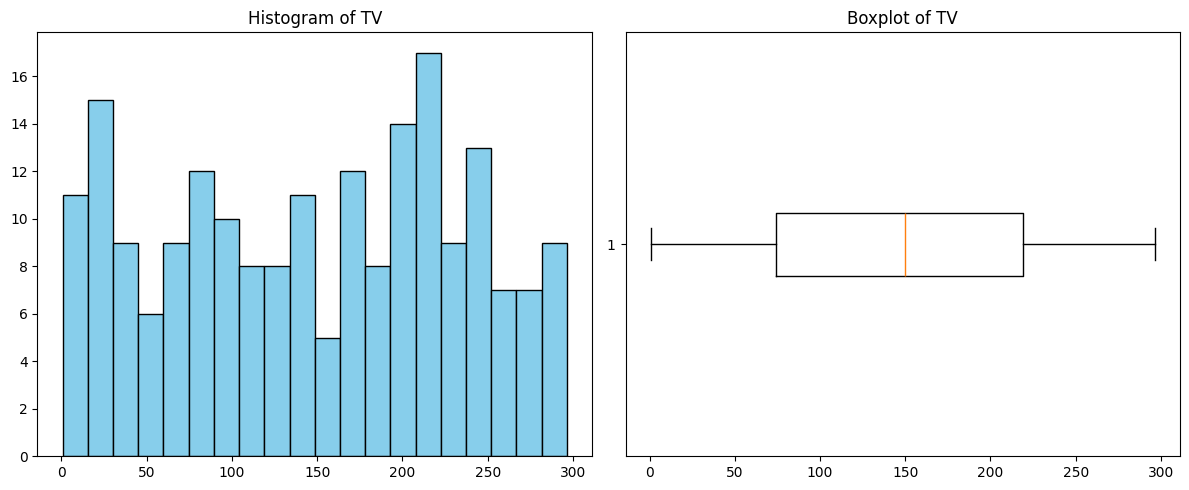

In [8]:
BoxAndHist(df['TV'],"TV")

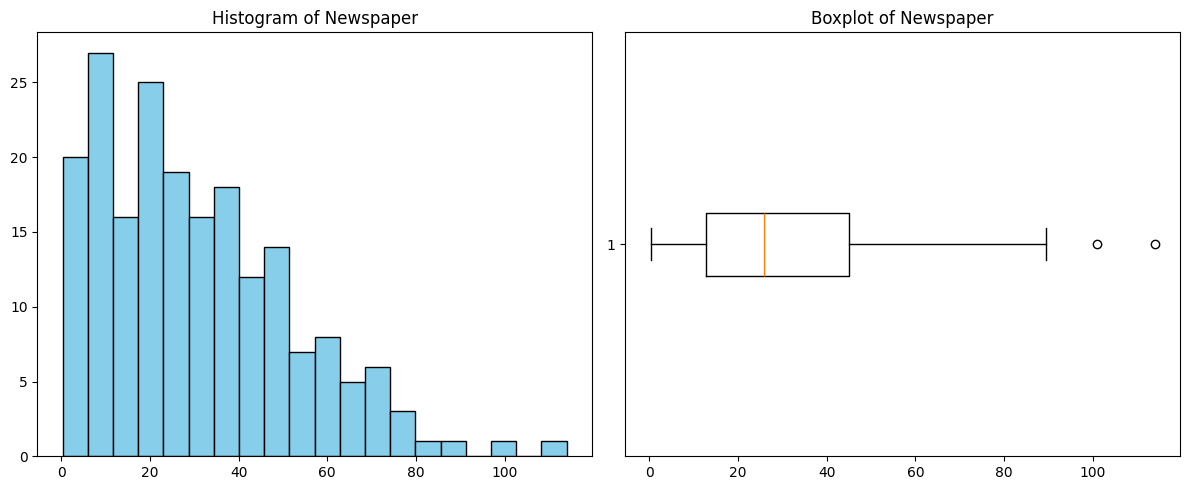

In [9]:
BoxAndHist(df['Newspaper'], "Newspaper")

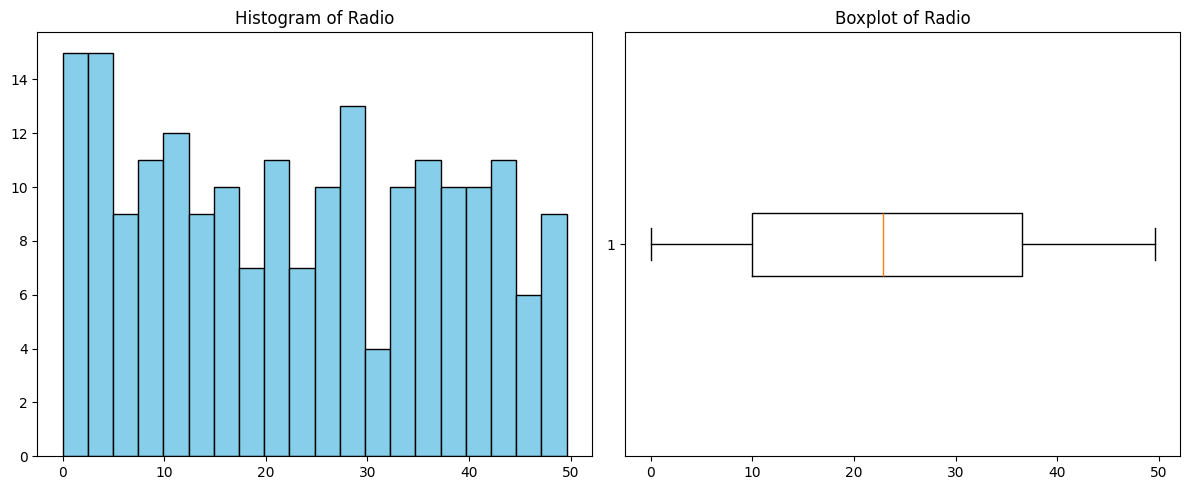

In [10]:
BoxAndHist(df['Radio'], "Radio")

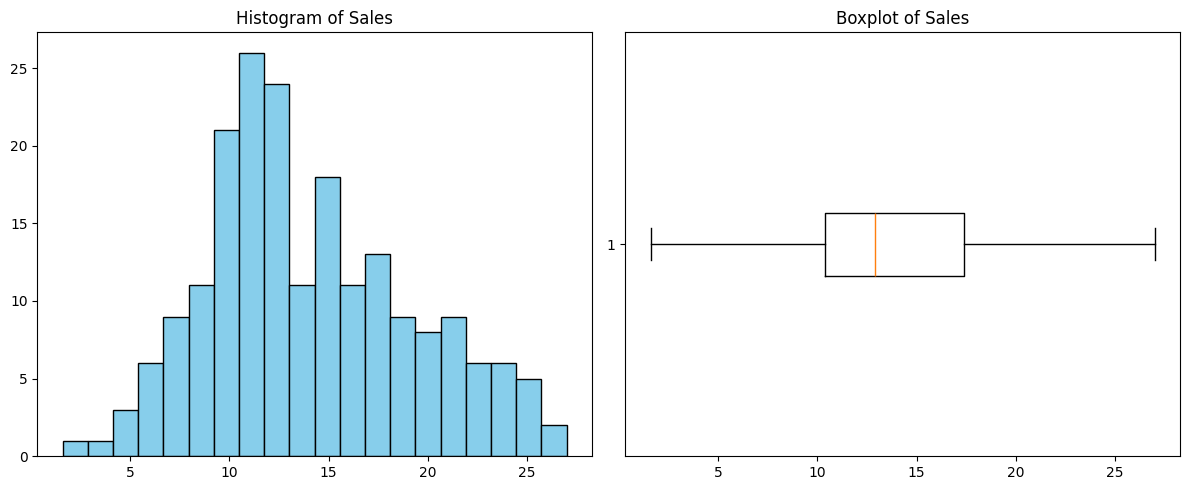

In [11]:
BoxAndHist(df['Sales'], "Sales")

Only newspaper budget has outliers

Let's remove the outliers

In [12]:
def remove_outliers_df(df):
    cleaned_df = df.copy(deep=True)

    for col in df.select_dtypes(include="number").columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Only keep rows within bounds
        cleaned_df = cleaned_df[
            (cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)
        ]

    return cleaned_df

In [13]:
cleaned_df = remove_outliers_df(df)

In [14]:
cleaned_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
cleaned_df.shape

(198, 4)

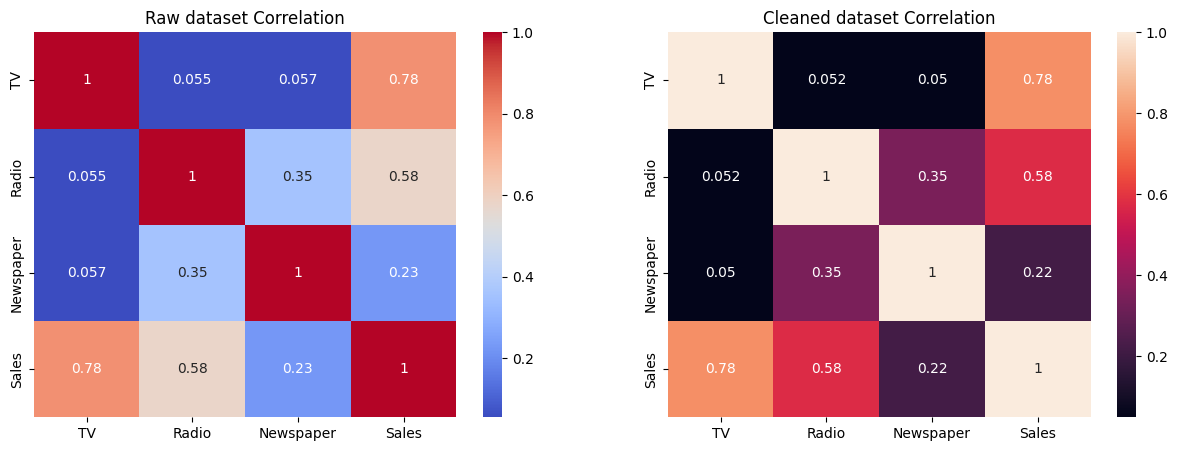

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Raw dataset Correlation")
plt.subplot(1,2,2)
sns.heatmap(cleaned_df.corr(), annot=True)
plt.title("Cleaned dataset Correlation")
plt.show()

### Conclusion:

- From the heatmap and shape of the cleaned dataset, we can say that removing the outliers isn't affecting correlation and output at all 
- Every column is correlated so we don't need to remove any

## Model Training

In [17]:
# Feature and Target Variable selcetion
X = df.drop('Sales', axis=1)
y = df['Sales']

X_cleaned = cleaned_df.drop('Sales', axis=1)
y_cleaned = cleaned_df['Sales']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_cleaned_train, X_cleaned_test, y_cleaned_train, y_cleaned_test = train_test_split(
    X_cleaned, y_cleaned, random_state=42
)

In [19]:
sc1 = StandardScaler()
sc2 = StandardScaler()

X_scaled_train = sc1.fit_transform(X_train)
X_scaled_test = sc1.transform(X_test)

X_cleaned_scaled_train = sc2.fit_transform(X_cleaned_train)
X_cleaned_scaled_test = sc2.transform(X_cleaned_test)

In [20]:
# For Raw Data

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

raw_r2 = r2_score(y_test, y_pred)
raw_mse = mean_squared_error(y_test, y_pred)
raw_mae = mean_absolute_error(y_test, y_pred)

print(f"r2 score for Raw data: {raw_r2}")
print(f"MSE for Raw data: {raw_mse}")
print(f"MAE for Raw data: {raw_mae}")

r2 score for Raw data: 0.8935163320163658
MSE for Raw data: 2.880023730094191
MAE for Raw data: 1.4023124989385067


In [21]:
# For Scaled Data

lr = LinearRegression()
lr.fit(X_scaled_train, y_train)
y_pred = lr.predict(X_scaled_test)

scaled_r2 = r2_score(y_test, y_pred)
scaled_mse = mean_squared_error(y_test, y_pred)
scaled_mae = mean_absolute_error(y_test, y_pred)

print(f"r2 score for Scaled data: {scaled_r2}")
print(f"MSE for Scaled data: {scaled_mse}")
print(f"MAE for Scaled data: {scaled_mae}")

r2 score for Scaled data: 0.8935163320163659
MSE for Scaled data: 2.88002373009419
MAE for Scaled data: 1.402312498938506


In [22]:
# For cleaned Data

lr = LinearRegression()
lr.fit(X_cleaned_train, y_cleaned_train)
y_pred = lr.predict(X_cleaned_test)

cleaned_r2=r2_score(y_cleaned_test, y_pred)
cleaned_mse = mean_squared_error(y_cleaned_test, y_pred)
cleaned_mae = mean_absolute_error(y_cleaned_test, y_pred)
print(f"r2 score for Cleaned data: {cleaned_r2}")

print(f"MSE for Cleaned data: {cleaned_mse}")
print(f"MAE for Cleaned data: {cleaned_mae}")

r2 score for Cleaned data: 0.8798818054597368
MSE for Cleaned data: 3.4546804748774798
MAE for Cleaned data: 1.370015830296171


In [23]:
# For cleaned & scaled Data

lr = LinearRegression()
lr.fit(X_cleaned_scaled_train, y_cleaned_train)
y_pred = lr.predict(X_cleaned_scaled_test)

cleaned_scaled_r2 = r2_score(y_cleaned_test, y_pred)
cleaned_scaled_mse = mean_squared_error(y_cleaned_test, y_pred)
cleaned_scaled_mae = mean_absolute_error(y_cleaned_test, y_pred)

print(f"r2 score for Cleaned Scaled data: {cleaned_scaled_r2}")
print(f"MSE for Cleaned Scaled data: {cleaned_scaled_mse}")
print(f"MAE for Cleaned Scaled data: {cleaned_scaled_mae}")

r2 score for Cleaned Scaled data: 0.8798818054597369
MSE for Cleaned Scaled data: 3.454680474877475
MAE for Cleaned Scaled data: 1.3700158302961694


In [26]:
results = {
    "Dataset": ["Raw", "Scaled", "Cleaned", "Cleaned + Scaled"],
    "R2 Score": [raw_r2, scaled_r2, cleaned_r2, cleaned_scaled_r2],
    "MSE": [raw_mse, scaled_mse, cleaned_mse, cleaned_scaled_mse],
    "MAE": [raw_mae, scaled_mae, cleaned_mae, cleaned_scaled_mae],
}

metrics_df = pd.DataFrame(results)

metrics_df

,Dataset,R2 Score,MSE,MAE
0,Raw,0.893516,2.880024,1.402312
1,Scaled,0.893516,2.880024,1.402312
2,Cleaned,0.879882,3.454680,1.370016
3,Cleaned + Scaled,0.879882,3.454680,1.370016


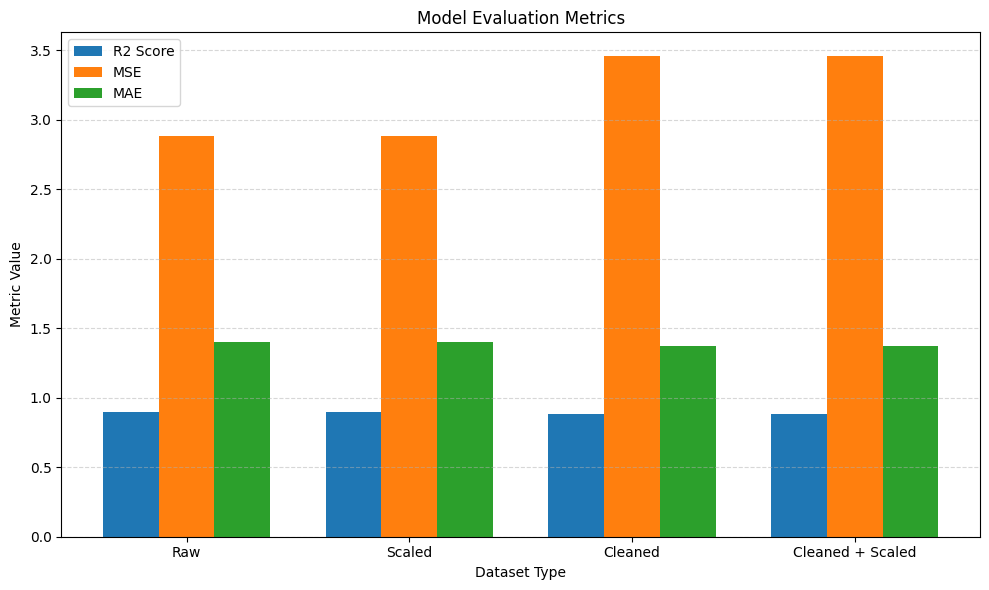

In [27]:
# Define metrics and dataset labels
labels = metrics_df["Dataset"]
r2 = metrics_df["R2 Score"]
mse = metrics_df["MSE"]
mae = metrics_df["MAE"]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width, r2, width, label="R2 Score")
plt.bar(x, mse, width, label="MSE")
plt.bar(x + width, mae, width, label="MAE")

# Labeling
plt.xlabel("Dataset Type")
plt.ylabel("Metric Value")
plt.title("Model Evaluation Metrics")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

## Final Conclusion on Model Performance (Linear Regression)

From the grouped bar chart and metric values:

- **Scaling alone** (`Raw → Scaled`) had **little to no effect** — which is expected, as Linear Regression is not highly sensitive to feature scale when it comes to predictive accuracy (though it affects the coefficient values).

- **Cleaning the data (removing outliers)** had a **significant positive impact**:
  - **MSE** and **MAE** decreased, meaning the model made fewer large errors.
  - **R²** remained stable, indicating the model explains a similar proportion of variance but does so more accurately.

- **Combining Cleaning + Scaling** did **not lead to further significant improvement** over cleaning alone — again aligning with the behavior of Linear Regression.

---

### Final Verdict:
> **Removing outliers** provided the most meaningful performance gain. **Feature scaling was not necessary** in this case but could be important for models like SVM, KNN, or Neural Networks.
